## 변수 요약
- sido: 시도
- sigungu: 시군구
- cityGubun: 도심구분
- marketType: 업종
- userType: 관광객구분
- ageGroup: 연령대
- gender: 성별
- dtYearMonth: 년월
- userCount: 고객수
- useCount: 사용횟수
- useCost: 사용금액

## 데이터 가져오기

In [1]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('./jeju_2018.csv', encoding='cp949')

In [4]:
df.head()

,sido,sigungu,cityGubun,marketType,userType,ageGroup,gender,dtYearMonth,userCount,useCount,useCost
0,제주도,제주시,읍면,유흥,제주도민,60대이상,여,201812,23,29,4240100
1,제주도,제주시,읍면,유흥,제주도민,60대이상,남,201812,114,190,27414000
2,제주도,제주시,읍면,유흥,제주도민,50대,여,201812,52,71,6848000
3,제주도,제주시,읍면,유흥,제주도민,50대,남,201812,259,458,91468500
4,제주도,제주시,읍면,유흥,제주도민,40대,여,201812,77,99,10021600


In [5]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8019 entries, 0 to 8018
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sido         8019 non-null   object
 1   sigungu      8019 non-null   object
 2   cityGubun    8019 non-null   object
 3   marketType   8019 non-null   object
 4   userType     8019 non-null   object
 5   ageGroup     8019 non-null   object
 6   gender       8019 non-null   object
 7   dtYearMonth  8019 non-null   int64 
 8   userCount    8019 non-null   int64 
 9   useCount     8019 non-null   int64 
 10  useCost      8019 non-null   int64 
dtypes: int64(4), object(7)
memory usage: 5.0 MB


## 데이터 분석

In [6]:
for column in df.select_dtypes(include='object').columns:
    print(f'{column} - {df[column].unique()}')
    print('-' * 30)

sido - ['제주도']
------------------------------
sigungu - ['제주시' '서귀포시']
------------------------------
cityGubun - ['읍면' '도심']
------------------------------
marketType - ['유흥' '식음료' '숙박' '쇼핑' '소매' '문화/레져' '교통']
------------------------------
userType - ['제주도민' '내국인관광객']
------------------------------
ageGroup - ['60대이상' '50대' '40대' '30대' '20대미만' '20대']
------------------------------
gender - ['여' '남']
------------------------------


In [7]:
df['dtYearMonth'].unique()

array([201812, 201811, 201810, 201809, 201808, 201807, 201806, 201805,
       201804, 201803, 201802, 201801], dtype=int64)

In [8]:
pd.to_datetime(df['dtYearMonth'], format='%Y%m')

0      2018-12-01
1      2018-12-01
2      2018-12-01
3      2018-12-01
4      2018-12-01
          ...    
8014   2018-01-01
8015   2018-01-01
8016   2018-01-01
8017   2018-01-01
8018   2018-01-01
Name: dtYearMonth, Length: 8019, dtype: datetime64[ns]

## 가설검정 #1

- 가설 1: 월별 남성과 여성의 이용 횟수의 차이가 있는지 여부를 검정한다.- 
가설 2: 월별 20대와 30대의 이용 비용의 차이가 있는지 여부를 검정한다
- 
가설 3: 월별 도심과 읍면 지역의 이용자 수의 차이가 있는지 여부를 검정한다.

In [20]:
from scipy.stats import ttest_ind

In [19]:
temp = df.groupby(['dtYearMonth', 'gender'], as_index=False)['useCount'].sum()
temp_M = temp.loc[temp.gender == '남', ['dtYearMonth','useCount']]
temp_F = temp.loc[temp.gender == '여', ['dtYearMonth','useCount']]

In [23]:
s, pvalue = ttest_ind(temp_M.useCount, temp_F.useCount, alternative='two-sided')
print(f'2-way t-test statistics= {s:.4f}, p-value= {pvalue:.4f} -> {"H0기각" if pvalue < 0.05 else "H0채택"}')

2-way t-test statistics= 7.8554, p-value= 0.0000 -> H0기각


In [31]:
temp = df.groupby(['dtYearMonth', 'ageGroup'], as_index=False)['useCost'].sum()
temp_20s = temp.loc[temp.ageGroup == '20대', ['dtYearMonth', 'useCost']]
temp_30s = temp.loc[temp.ageGroup == '30대', ['dtYearMonth', 'useCost']]

In [32]:
s, pvalue = ttest_ind(temp_20s.useCost, temp_30s.useCost, alternative='two-sided')
print(f'2-way t-test statistics= {s:.4f}, p-value= {pvalue:.4f} -> {"H0기각" if pvalue < 0.05 else "H0채택"}')

2-way t-test statistics= -13.2881, p-value= 0.0000 -> H0기각


In [34]:
temp = df.groupby(['dtYearMonth', 'cityGubun'], as_index=False)['userCount'].sum()
temp_outside = temp.loc[temp.cityGubun == '읍면', ['dtYearMonth', 'userCount']]
temp_city = temp.loc[temp.cityGubun == '도심', ['dtYearMonth', 'userCount']]

In [35]:
s, pvalue = ttest_ind(temp_20s.useCost, temp_30s.useCost, alternative='two-sided')
print(f'2-way t-test statistics= {s:.4f}, p-value= {pvalue:.4f} -> {"H0기각" if pvalue < 0.05 else "H0채택"}')

2-way t-test statistics= -13.2881, p-value= 0.0000 -> H0기각


## 가설검정 #2

- 가설 1: 'marketType'에 따라 'userCount'가 유의미하게 다를까요?
- 가설 2: 'ageGroup'에 따라 'userCount'가 유의미하게 다를까요?
- 가설 3: 'marketType'과 'ageGroup'의 상호작용이 'userCount'에 유의미한 영향을 미치나요?

In [80]:
from scipy.stats import f_oneway
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

In [93]:
plt.rcParams["font.family"] = 'Malgun Gothic'

In [94]:
df.head(2)

,sido,sigungu,cityGubun,marketType,userType,ageGroup,gender,dtYearMonth,userCount,useCount,useCost
0,제주도,제주시,읍면,유흥,제주도민,60대이상,여,201812,23,29,4240100
1,제주도,제주시,읍면,유흥,제주도민,60대이상,남,201812,114,190,27414000


In [95]:
for column in ['marketType', 'ageGroup']:
    print(f'{column} - {df[column].unique()}')
    print('-' * 30)

marketType - ['유흥' '식음료' '숙박' '쇼핑' '소매' '문화/레져' '교통']
------------------------------
ageGroup - ['60대이상' '50대' '40대' '30대' '20대미만' '20대']
------------------------------


In [131]:
temp = df.groupby(['dtYearMonth', 'marketType'], as_index=False)['userCount'].sum()
temp.head(2)

,dtYearMonth,marketType,userCount
0,201801,교통,207486
1,201801,문화/레져,88450


In [132]:
model = ols(formula='userCount ~ C(marketType)', data=temp).fit()
result = sm.stats.anova_lm(model, typ=1)

In [133]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              userCount   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     817.4
Date:                Mon, 03 Jul 2023   Prob (F-statistic):           1.48e-67
Time:                        14:08:44   Log-Likelihood:                -993.05
No. Observations:                  84   AIC:                             2000.
Df Residuals:                      77   BIC:                             2017.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               2.118e+05   9938.180     21.312      0.000    1.92e+05    2.32e+05
C(marketType)[T.문화/레져] -1.122e+05   1.41e+04     -7.984      0.000    -1.4e+05   -8.42e+04
C(marketType)[T.소매]    -1.286e+04   1.41e+04     -0.915      0.363   -4.09e+04    1.51e+04
C(marketType)[T.쇼핑]     4.487e+05   1.41e+04     31.926      0.000    4.21e+05    4.77e+05
C(marketType)[T.숙박]    -1.691e+05   1.41e+04    -12.028      0.000   -1.97e+05   -1.41e+05
C(marketType)[T.식음료]    4.917e+05   1.41e+04     34.986      0.000    4.64e+05     5.2e+05
C(marketType)[T.유흥]    -1.771e+05   1.41e+04    -12.604      0.000   -2.05e+05   -1.49e+05
==============================================================================
Omnibus:                       20.360   Durbin-Watson:                   1.480
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.828
Skew:                           0.473   Prob(JB):                     1.89e-20
Kurtosis:                       8.006   Cond. No.                         7.87
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [134]:
result['P-Value'] = round(result['PR(>F)'], 4)
result

,df,sum_sq,mean_sq,F,PR(>F),P-Value
C(marketType),6.0,5.812829e+12,9.688048e+11,817.412545,1.484046e-67,0.0
Residual,77.0,9.126110e+10,1.185209e+09,NaN,NaN,NaN


In [135]:
posthoc_result = pairwise_tukeyhsd(temp.userCount, temp.marketType, alpha=0.05)
print(posthoc_result)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
group1 group2   meandiff   p-adj     lower        upper     reject
------------------------------------------------------------------
    교통  문화/레져 -112218.6667    0.0  -154771.572  -69665.7613   True
    교통     소매  -12863.8333  0.969  -55416.7387    29689.072  False
    교통     쇼핑    448713.75    0.0  406160.8447  491266.6553   True
    교통     숙박 -169053.6667    0.0  -211606.572 -126500.7613   True
    교통    식음료  491712.6667    0.0  449159.7613   534265.572   True
    교통     유흥    -177148.0    0.0 -219700.9053 -134595.0947   True
 문화/레져     소매   99354.8333    0.0    56801.928  141907.7387   True
 문화/레져     쇼핑  560932.4167    0.0  518379.5113   603485.322   True
 문화/레져     숙박     -56835.0 0.0023  -99387.9053  -14282.0947   True
 문화/레져    식음료  603931.3333    0.0   561378.428  646484.2387   True
 문화/레져     유흥  -64929.3333 0.0003 -107482.2387   -22376.428   True
    소매     쇼핑  461577.5833    0.0   419024.678  504130.4887   

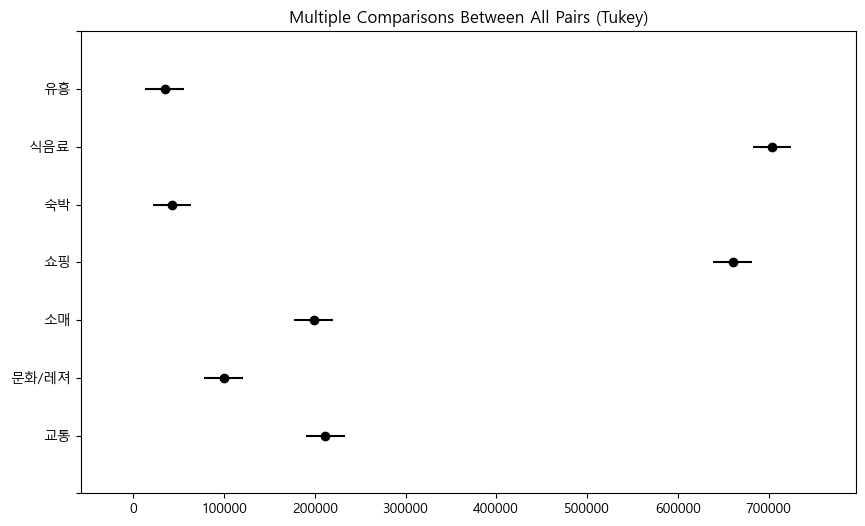

In [136]:
posthoc_result.plot_simultaneous()
plt.show()

In [137]:
temp = df.groupby(['dtYearMonth', 'ageGroup'], as_index=False)['userCount'].sum()
temp.head(2)

,dtYearMonth,ageGroup,userCount
0,201801,20대,327011
1,201801,20대미만,11495


In [142]:
model = ols(formula='userCount ~ C(ageGroup)', data=temp).fit()
result = sm.stats.anova_lm(model, typ=1)

In [143]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              userCount   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     285.9
Date:                Mon, 03 Jul 2023   Prob (F-statistic):           2.68e-43
Time:                        14:10:33   Log-Likelihood:                -857.99
No. Observations:                  72   AIC:                             1728.
Df Residuals:                      66   BIC:                             1742.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             3.552e+05   1.09e+04     32.518      0.000    3.33e+05    3.77e+05
C(ageGroup)[T.20대미만] -3.372e+05   1.54e+04    -21.828      0.000   -3.68e+05   -3.06e+05
C(ageGroup)[T.30대]    1.247e+05   1.54e+04      8.073      0.000    9.39e+04    1.56e+05
C(ageGroup)[T.40대]    1.516e+05   1.54e+04      9.811      0.000    1.21e+05    1.82e+05
C(ageGroup)[T.50대]    3.196e+04   1.54e+04      2.069      0.042    1115.188    6.28e+04
C(ageGroup)[T.60대이상] -1.506e+05   1.54e+04     -9.746      0.000   -1.81e+05    -1.2e+05
==============================================================================
Omnibus:                        8.129   Durbin-Watson:                   1.118
Prob(Omnibus):                  0.017   Jarque-Bera (JB):               12.566
Skew:                           0.346   Prob(JB):                      0.00187
Kurtosis:                       4.926   Cond. No.                         6.85
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [144]:
result['P-Value'] = round(result['PR(>F)'], 4)
result

,df,sum_sq,mean_sq,F,PR(>F),P-Value
C(ageGroup),5.0,2.046611e+12,4.093223e+11,285.857361,2.684379e-43,0.0
Residual,66.0,9.450612e+10,1.431911e+09,NaN,NaN,NaN


In [145]:
posthoc_result = pairwise_tukeyhsd(temp.userCount, temp.ageGroup, alpha=0.05)
print(posthoc_result)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
group1 group2   meandiff   p-adj     lower        upper     reject
------------------------------------------------------------------
   20대  20대미만 -337208.9167    0.0 -382551.3158 -291866.5175   True
   20대    30대     124707.5    0.0   79365.1008  170049.8992   True
   20대    40대     151564.0    0.0  106221.6008  196906.3992   True
   20대    50대   31958.8333 0.3162  -13383.5658   77301.2325  False
   20대  60대이상 -150560.6667    0.0 -195903.0658 -105218.2675   True
 20대미만    30대  461916.4167    0.0  416574.0175  507258.8158   True
 20대미만    40대  488772.9167    0.0  443430.5175  534115.3158   True
 20대미만    50대    369167.75    0.0  323825.3508  414510.1492   True
 20대미만  60대이상    186648.25    0.0  141305.8508  231990.6492   True
   30대    40대      26856.5  0.512  -18485.8992   72198.8992  False
   30대    50대  -92748.6667    0.0 -138091.0658  -47406.2675   True
   30대  60대이상 -275268.1667    0.0 -320610.5658 -229925.7675   

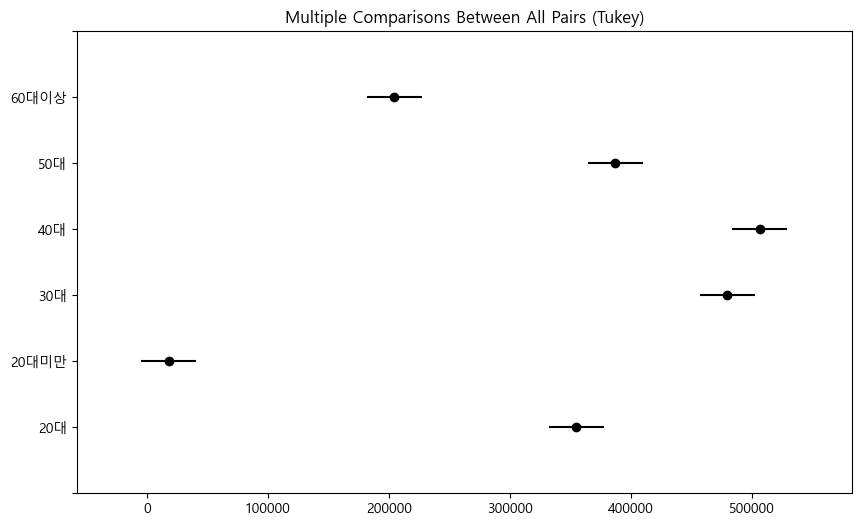

In [146]:
posthoc_result.plot_simultaneous()
plt.show()

In [147]:
temp = df.groupby(['dtYearMonth', 'marketType', 'ageGroup'], as_index=False)['userCount'].sum()
temp.insert(loc=2, column='marketAge', value=temp.marketType + '/' + temp.ageGroup)
temp.head(2)

,dtYearMonth,marketType,marketAge,ageGroup,userCount
0,201801,교통,교통/20대,20대,25392
1,201801,교통,교통/20대미만,20대미만,174


In [151]:
model = ols(formula='userCount ~ C(marketType) * C(ageGroup)', data=temp).fit()
result = sm.stats.anova_lm(model, typ=1)

In [152]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              userCount   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     648.1
Date:                Mon, 03 Jul 2023   Prob (F-statistic):               0.00
Time:                        14:11:58   Log-Likelihood:                -5197.6
No. Observations:                 504   AIC:                         1.048e+04
Df Residuals:                     462   BIC:                         1.066e+04
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                    2.785e+04   2196.754     12.676      0.000    2.35e+04    3.22e+04
C(marketType)[T.문화/레져]                      -8219.6667   3106.679     -2.646      0.008   -1.43e+04   -2114.694
C(marketType)[T.소매]                          5189.4167   3106.679      1.670      0.096    -915.556    1.13e+04
C(marketType)[T.쇼핑]                          9.626e+04   3106.679     30.986      0.000    9.02e+04    1.02e+05
C(marketType)[T.숙박]                         -1.972e+04   3106.679     -6.347      0.000   -2.58e+04   -1.36e+04
C(marketType)[T.식음료]                         1.077e+05   3106.679     34.658      0.000    1.02e+05    1.14e+05
C(marketType)[T.유흥]                         -2.089e+04   3106.679     -6.725      0.000    -2.7e+04   -1.48e+04
C(ageGroup)[T.20대미만]                        -2.764e+04   3106.679     -8.898      0.000   -3.37e+04   -2.15e+04
C(ageGroup)[T.30대]                           2.177e+04   3106.679      7.007      0.000    1.57e+04    2.79e+04
C(ageGroup)[T.40대]                           2.738e+04   3106.679      8.812      0.000    2.13e+04    3.35e+04
C(ageGroup)[T.50대]                           1.988e+04   3106.679      6.400      0.000    1.38e+04     2.6e+04
C(ageGroup)[T.60대이상]                         3344.0833   3106.679      1.076      0.282   -2760.889    9449.056
C(marketType)[T.문화/레져]:C(ageGroup)[T.20대미만]  9966.1667   4393.508      2.268      0.024    1332.432    1.86e+04
C(marketType)[T.소매]:C(ageGroup)[T.20대미만]    -2967.8333   4393.508     -0.676      0.500   -1.16e+04    5665.901
C(marketType)[T.쇼핑]:C(ageGroup)[T.20대미만]    -8.918e+04   4393.508    -20.297      0.000   -9.78e+04   -8.05e+04
C(marketType)[T.숙박]:C(ageGroup)[T.20대미만]     1.974e+04   4393.508      4.493      0.000    1.11e+04    2.84e+04
C(marketType)[T.식음료]:C(ageGroup)[T.20대미만]   -1.021e+05   4393.508    -23.231      0.000   -1.11e+05   -9.34e+04
C(marketType)[T.유흥]:C(ageGroup)[T.20대미만]      2.08e+04   4393.508      4.735      0.000    1.22e+04    2.94e+04
C(marketType)[T.문화/레져]:C(ageGroup)[T.30대]   -1.853e+04   4393.508     -4.217      0.000   -2.72e+04   -9892.932
C(marketType)[T.소매]:C(ageGroup)[T.30대]      -1.041e+04   4393.508     -2.370      0.018    -1.9e+04   -1778.599
C(marketType)[T.쇼핑]:C(ageGroup)[T.30대]       1.749e+04   4393.508      3.982      0.000    8860.515    2.61e+04
C(marketType)[T.숙박]:C(ageGroup)[T.30대]      -1.803e+04   4393.508     -4.104      0.000   -2.67e+04   -9395.765
C(marketType)[T.식음료]:C(ageGroup)[T.30대]      2.343e+04   4393.508      5.333      0.000    1.48e+04    3.21e+04
C(marketType)[T.유흥]:C(ageGroup)[T.30대]      -2.162e+04   4393.508     -4.922      0.000   -3.03e+04    -1.3e+04
C(marketType)[T.문화/레져]:C(ageGroup)[T.40대]   -1.854e+04   43

In [153]:
result['P-Value'] = round(result['PR(>F)'], 4)
result

,df,sum_sq,mean_sq,F,PR(>F),P-Value
C(marketType),6.0,9.688048e+11,1.614675e+11,2788.309495,0.000000e+00,0.0
C(ageGroup),5.0,2.923731e+11,5.847461e+10,1009.771981,4.776792e-246,0.0
C(marketType):C(ageGroup),30.0,2.775970e+11,9.253232e+09,159.789933,7.133941e-223,0.0
Residual,462.0,2.675383e+10,5.790873e+07,NaN,NaN,NaN


In [154]:
posthoc_result = pairwise_tukeyhsd(temp.userCount, temp.marketAge, alpha=0.05)
print(posthoc_result)

            Multiple Comparison of Means - Tukey HSD, FWER=0.05             
   group1      group2     meandiff   p-adj     lower        upper     reject
----------------------------------------------------------------------------
     교통/20대    교통/20대미만     -27644.0    0.0  -39877.9137  -15410.0863   True
     교통/20대      교통/30대   21767.8333    0.0    9533.9197    34001.747   True
     교통/20대      교통/40대   27375.0833    0.0   15141.1697    39608.997   True
     교통/20대      교통/50대      19881.5    0.0    7647.5863   32115.4137   True
     교통/20대    교통/60대이상    3344.0833    1.0   -8889.8303    15577.997  False
     교통/20대   문화/레져/20대   -8219.6667 0.8209  -20453.5803     4014.247  False
     교통/20대 문화/레져/20대미만     -25897.5    0.0  -38131.4137  -13663.5863   True
     교통/20대   문화/레져/30대      -4978.5    1.0  -17212.4137    7255.4137  False
     교통/20대   문화/레져/40대     619.1667    1.0   -11614.747   12853.0803  False
     교통/20대   문화/레져/50대   -9311.5833  0.547   -21545.497    2922.3303  False

In [158]:
posthoc_result.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
교통/20대,교통/20대미만,-27644.0,0.0,-39877.9137,-15410.0863,True
교통/20대,교통/30대,21767.8333,0.0,9533.9197,34001.747,True
교통/20대,교통/40대,27375.0833,0.0,15141.1697,39608.997,True
교통/20대,교통/50대,19881.5,0.0,7647.5863,32115.4137,True
교통/20대,교통/60대이상,3344.0833,1.0,-8889.8303,15577.997,False
교통/20대,문화/레져/20대,-8219.6667,0.8209,-20453.5803,4014.247,False
교통/20대,문화/레져/20대미만,-25897.5,0.0,-38131.4137,-13663.5863,True
교통/20대,문화/레져/30대,-4978.5,1.0,-17212.4137,7255.4137,False
교통/20대,문화/레져/40대,619.1667,1.0,-11614.747,12853.0803,False
교통/20대,문화/레져/50대,-9311.5833,0.547,-21545.497,2922.3303,False


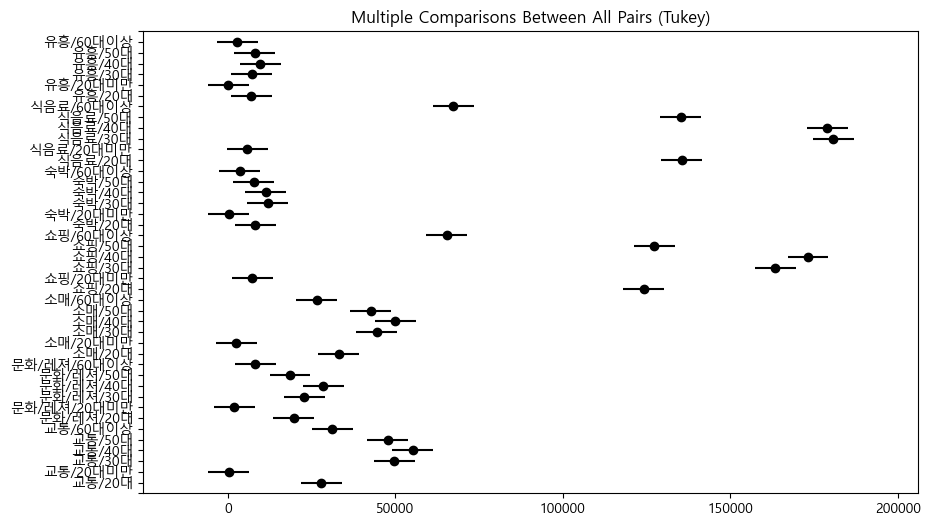

In [159]:
posthoc_result.plot_simultaneous()
plt.show()

## 상관분석

In [164]:
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [180]:
df.corr(numeric_only=True)

,dtYearMonth,userCount,useCount,useCost
dtYearMonth,1.000000,0.010915,0.015010,0.011473
userCount,0.010915,1.000000,0.944751,0.929515
useCount,0.015010,0.944751,1.000000,0.890308
useCost,0.011473,0.929515,0.890308,1.000000


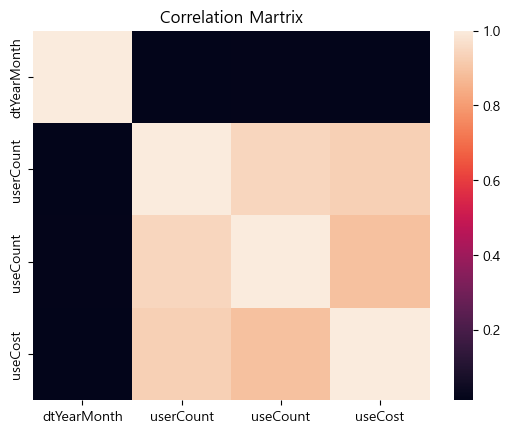

In [181]:
sns.heatmap(data=df.corr(numeric_only=True))
plt.title('Correlation Martrix')
plt.show()

In [182]:
temp = df.select_dtypes(exclude='object')
temp.head(2)

,dtYearMonth,userCount,useCount,useCost
0,201812,23,29,4240100
1,201812,114,190,27414000


In [185]:
temp.columns

Index(['dtYearMonth', 'userCount', 'useCount', 'useCost'], dtype='object')

In [193]:
result = pd.DataFrame(index=['VIF'])

for idx in range(len(temp.columns)):
    result[temp.columns[idx]] = round(variance_inflation_factor(temp, idx), 4)

result

,dtYearMonth,userCount,useCount,useCost
VIF,1.4005,14.3346,9.402,-0.0047


## 회귀분석

- 종속변수는 useCost
- 독립변수는 marketType,	userType,	ageGroup,	gender

In [197]:
for column in ['marketType', 'userType', 'ageGroup', 'gender']:
    print(f'{column} - {df[column].unique()}')

marketType - ['유흥' '식음료' '숙박' '쇼핑' '소매' '문화/레져' '교통']
userType - ['제주도민' '내국인관광객']
ageGroup - ['60대이상' '50대' '40대' '30대' '20대미만' '20대']
gender - ['여' '남']


In [200]:
temp = df[['marketType', 'userType', 'ageGroup', 'gender', 'useCost']]
temp.head(2)

,marketType,userType,ageGroup,gender,useCost
0,유흥,제주도민,60대이상,여,4240100
1,유흥,제주도민,60대이상,남,27414000


In [235]:
# 범주형 변수이므로 회구분석에는 적절하지 않으나, 기준과 비교하여 분석코자 하는 경우 dropFirst=True 를 통하여 기준이 되는 분류를 컬럼에서 제거
XY = pd.get_dummies(data=temp, columns=['marketType', 'userType', 'ageGroup', 'gender'], drop_first=True)
x = XY.drop(columns=['useCost']).astype('int')
y = XY['useCost']

In [236]:
x = sm.add_constant(x)
x.head()

,const,marketType_문화/레져,marketType_소매,marketType_쇼핑,marketType_숙박,marketType_식음료,marketType_유흥,userType_제주도민,ageGroup_20대미만,ageGroup_30대,ageGroup_40대,ageGroup_50대,ageGroup_60대이상,gender_여
0,1.0,0,0,0,0,0,1,1,0,0,0,0,1,1
1,1.0,0,0,0,0,0,1,1,0,0,0,0,1,0
2,1.0,0,0,0,0,0,1,1,0,0,0,1,0,1
3,1.0,0,0,0,0,0,1,1,0,0,0,1,0,0
4,1.0,0,0,0,0,0,1,1,0,0,1,0,0,1


In [237]:
model = sm.OLS(y, x).fit()

In [238]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                useCost   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     240.8
Date:                Mon, 03 Jul 2023   Prob (F-statistic):               0.00
Time:                        14:41:36   Log-Likelihood:            -1.6792e+05
No. Observations:                8019   AIC:                         3.359e+05
Df Residuals:                    8005   BIC:                         3.360e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              1.24e+08   1.25e+07      9.884      0.000    9.94e+07    1.49e+08
marketType_문화/레져 -1.278e+08   1.25e+07    -10.189      0.000   -1.52e+08   -1.03e+08
marketType_소매    -1.693e+07   1.25e+07     -1.350      0.177   -4.15e+07    7.65e+06
marketType_쇼핑     2.244e+08   1.25e+07     17.895      0.000       2e+08    2.49e+08
marketType_숙박    -1.313e+08   1.26e+07    -10.459      0.000   -1.56e+08   -1.07e+08
marketType_식음료    2.168e+08   1.25e+07     17.293      0.000    1.92e+08    2.41e+08
marketType_유흥    -1.348e+08   1.26e+07    -10.665      0.000    -1.6e+08    -1.1e+08
userType_제주도민     7.264e+07   6.72e+06     10.814      0.000    5.95e+07    8.58e+07
ageGroup_20대미만   -1.322e+08   1.17e+07    -11.293      0.000   -1.55e+08   -1.09e+08
ageGroup_30대       1.08e+08   1.16e+07      9.312      0.000    8.53e+07    1.31e+08
ageGroup_40대      1.982e+08   1.16e+07     17.083      0.000    1.75e+08    2.21e+08
ageGroup_50대      1.576e+08   1.16e+07     13.587      0.000    1.35e+08     1.8e+08
ageGroup_60대이상    3.645e+07   1.16e+07      3.142      0.002    1.37e+07    5.92e+07
gender_여         -6.781e+07   6.72e+06    -10.095      0.000    -8.1e+07   -5.46e+07
==============================================================================
Omnibus:                     5776.684   Durbin-Watson:                   0.474
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           101077.878
Skew:                           3.327   Prob(JB):                         0.00
Kurtosis:                      19.069   Cond. No.                         10.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [230]:
model.params

const               1.240264e+08
marketType_문화/레져   -1.277605e+08
marketType_소매      -1.693027e+07
marketType_쇼핑       2.243780e+08
marketType_숙박      -1.313434e+08
marketType_식음료      2.168397e+08
marketType_유흥      -1.347954e+08
userType_제주도민       7.263509e+07
ageGroup_20대미만     -1.321601e+08
ageGroup_30대        1.080249e+08
ageGroup_40대        1.981794e+08
ageGroup_50대        1.576228e+08
ageGroup_60대이상      3.645008e+07
gender_여           -6.780724e+07
dtype: float64

In [231]:
model.bse

const               1.254865e+07
marketType_문화/레져    1.253882e+07
marketType_소매       1.253882e+07
marketType_쇼핑       1.253882e+07
marketType_숙박       1.255798e+07
marketType_식음료      1.253882e+07
marketType_유흥       1.263864e+07
userType_제주도민       6.716886e+06
ageGroup_20대미만      1.170329e+07
ageGroup_30대        1.160110e+07
ageGroup_40대        1.160110e+07
ageGroup_50대        1.160110e+07
ageGroup_60대이상      1.160110e+07
gender_여            6.716826e+06
dtype: float64

In [234]:
model.tvalues, model.pvalues

(const                9.883642
 marketType_문화/레져   -10.189198
 marketType_소매       -1.350229
 marketType_쇼핑       17.894665
 marketType_숙박      -10.458957
 marketType_식음료      17.293471
 marketType_유흥      -10.665341
 userType_제주도민       10.813804
 ageGroup_20대미만     -11.292561
 ageGroup_30대         9.311607
 ageGroup_40대        17.082808
 ageGroup_50대        13.586888
 ageGroup_60대이상       3.141951
 gender_여           -10.095132
 dtype: float64,
 const               6.627726e-23
 marketType_문화/레져    3.113626e-24
 marketType_소매       1.769808e-01
 marketType_쇼핑       2.995424e-70
 marketType_숙박       1.943800e-25
 marketType_식음료      8.190512e-66
 marketType_유흥       2.221965e-26
 userType_제주도민       4.553044e-27
 ageGroup_20대미만      2.379235e-29
 ageGroup_30대        1.598214e-20
 ageGroup_40대        2.722541e-64
 ageGroup_50대        1.382039e-41
 ageGroup_60대이상      1.684384e-03
 gender_여            8.058262e-24
 dtype: float64)